# $\color{indianred}{\text{Comparison of two inversion methods}}$

In [5]:
# Importing necessary packages

import pyMilne
import MilneEddington
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [7]:
# Importing data

data1 = fits.open('modelout_pixel-to-pixel.fits')[0].data
data2 = fits.open('modelout_spatially_coupled.fits')[0].data

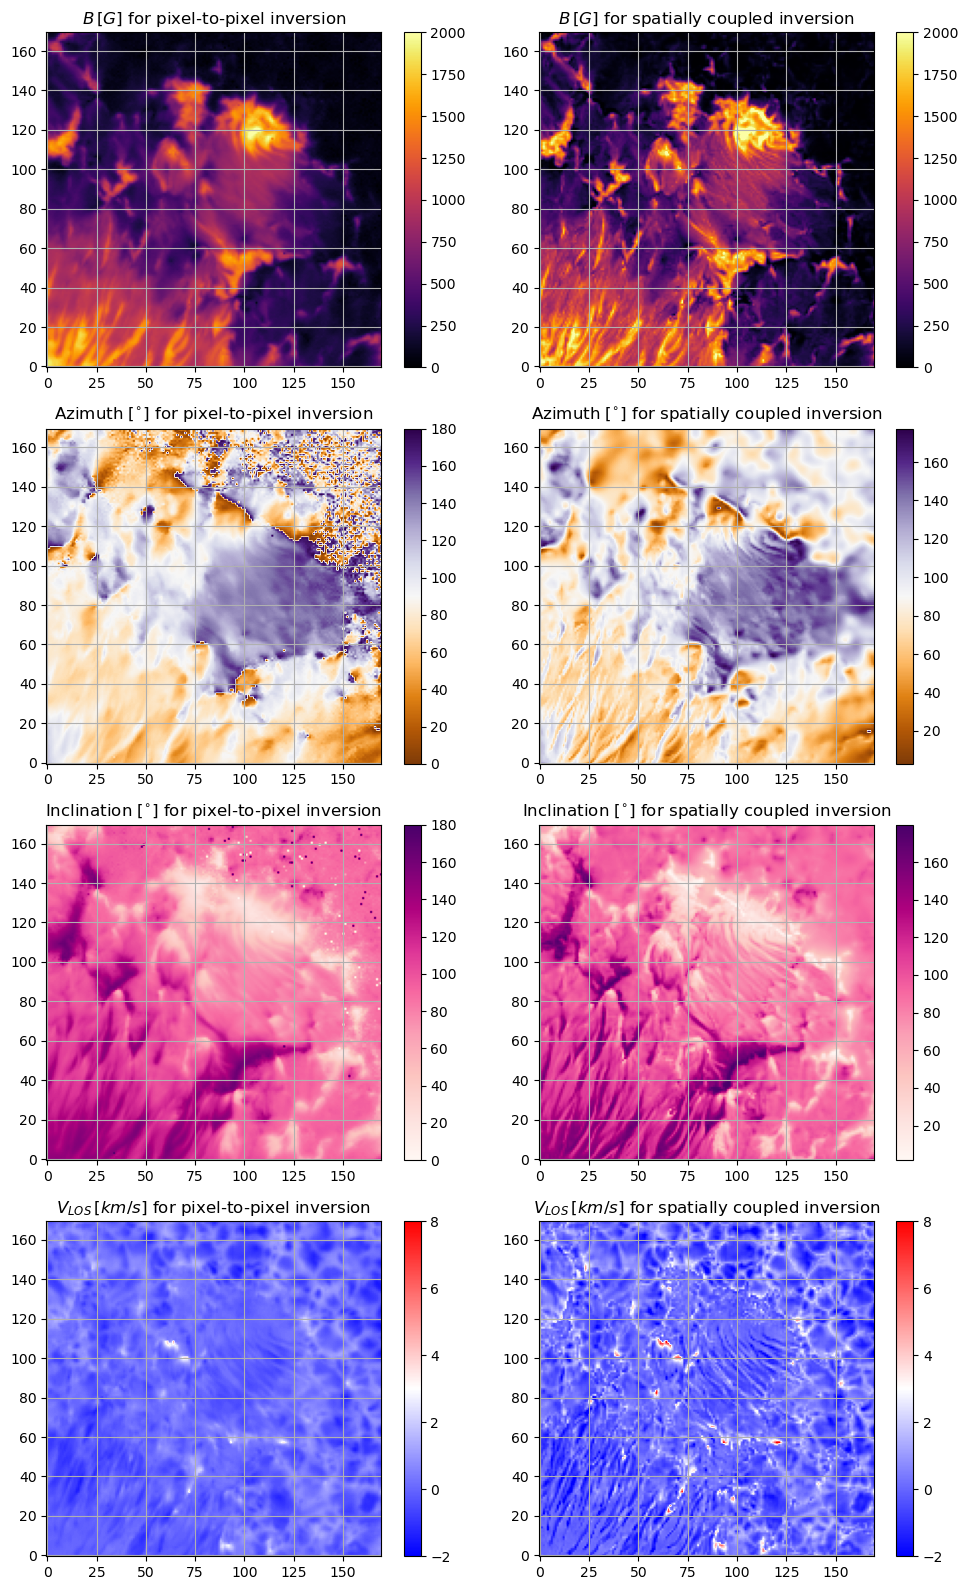

In [12]:
plt.figure(figsize=(10, 16))

plt.subplot(4, 2, 1)
plt.grid()
plt.imshow(data1[:, :, 0].T, cmap='inferno', origin='lower', vmin=0, vmax=2000)
plt.colorbar()
plt.title(r'$B\,[G]$ for pixel-to-pixel inversion')

plt.subplot(4, 2, 2)
plt.grid()
plt.imshow(data2[:, :, 0].T, cmap='inferno', origin='lower', vmin=0, vmax=2000)
plt.colorbar()
plt.title(r'$B\,[G]$ for spatially coupled inversion')

plt.subplot(4, 2, 3)
plt.grid()
plt.imshow(data1[:, :, 2].T*180./np.pi, cmap='PuOr', origin='lower')
plt.colorbar()
plt.title(r'Azimuth $[^{\circ}]$ for pixel-to-pixel inversion')

plt.subplot(4, 2, 4)
plt.grid()
plt.imshow(data2[:, :, 2].T*180./np.pi, cmap='PuOr', origin='lower')
plt.colorbar()
plt.title(r'Azimuth $[^{\circ}]$ for spatially coupled inversion')

plt.subplot(4, 2, 5)
plt.grid()
plt.imshow(data1[:, :, 1].T*180./np.pi, cmap='RdPu', origin='lower')
plt.colorbar()
plt.title(r'Inclination $[^{\circ}]$ for pixel-to-pixel inversion')

plt.subplot(4, 2, 6)
plt.grid()
plt.imshow(data2[:, :, 1].T*180./np.pi, cmap='RdPu', origin='lower')
plt.colorbar()
plt.title(r'Inclination $[^{\circ}]$ for spatially coupled inversion')

plt.subplot(4, 2, 7)
plt.grid()
plt.imshow(data1[:, :, 3].T, cmap='bwr', origin='lower', vmin=-2, vmax=8)
plt.colorbar()
plt.title(r'$V_{LOS}\,[km/s]$ for pixel-to-pixel inversion')

plt.subplot(4, 2, 8)
plt.grid()
plt.imshow(data2[:, :, 3].T, cmap='bwr', origin='lower', vmin=-2, vmax=8)
plt.colorbar()
plt.title(r'$V_{LOS}\,[km/s]$ for spatially coupled inversion')

plt.tight_layout()
plt.show()

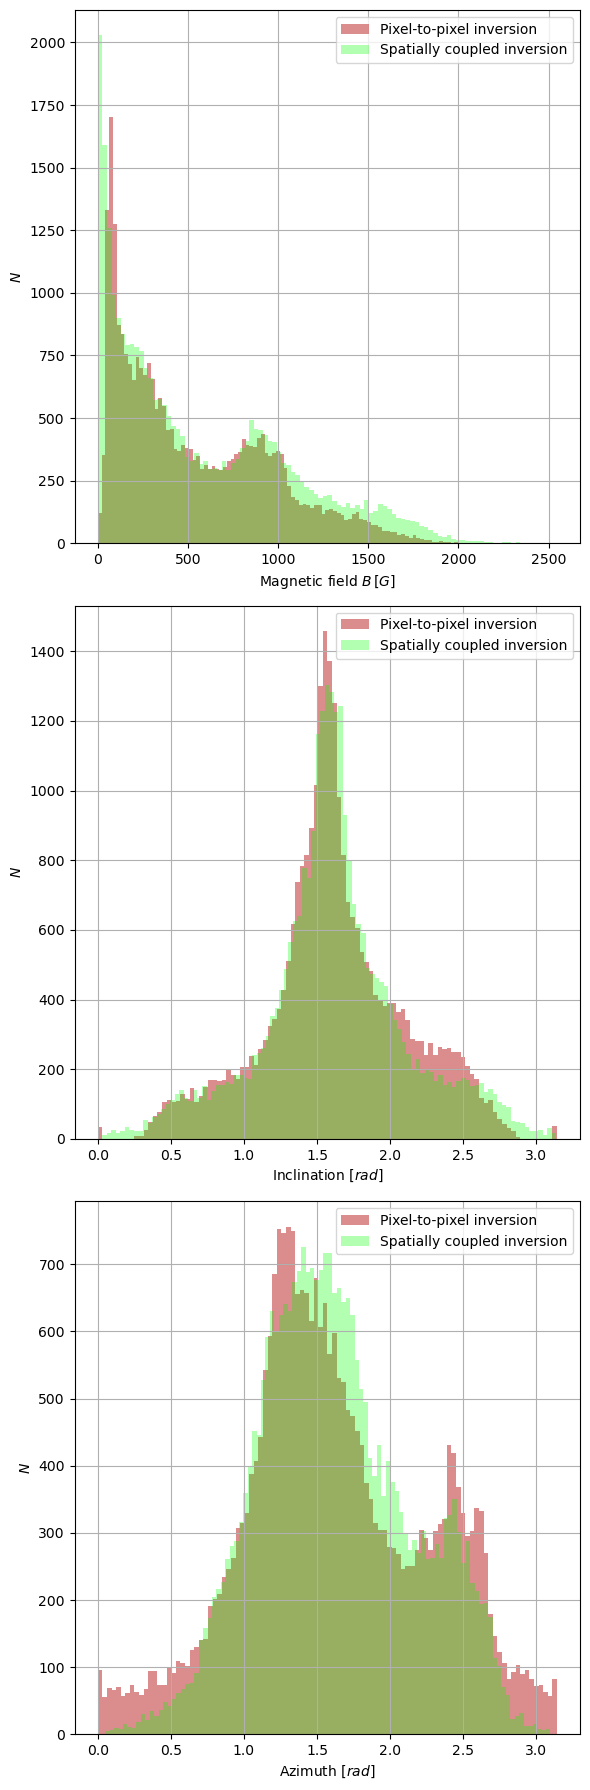

In [40]:
# Histograms - different approach to comparison of the two inversion methods

parameters = [r'Magnetic field $B\,[G]$',
                   r'Inclination $[rad]$',
                   r'Azimuth $[rad]$']

num_bins = 100
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(6, 18))
for i, ax in enumerate(axs.flat):
    ax.hist(data1[:, :, i].ravel(), bins=num_bins, color='indianred',
            alpha=0.7, label='Pixel-to-pixel inversion')
    ax.hist(data2[:, :, i].ravel(), bins=num_bins, color='lime',
            alpha=0.3, label='Spatially coupled inversion')
    ax.set_xlabel(parameters[i])
    ax.set_ylabel(r'$N$')
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()

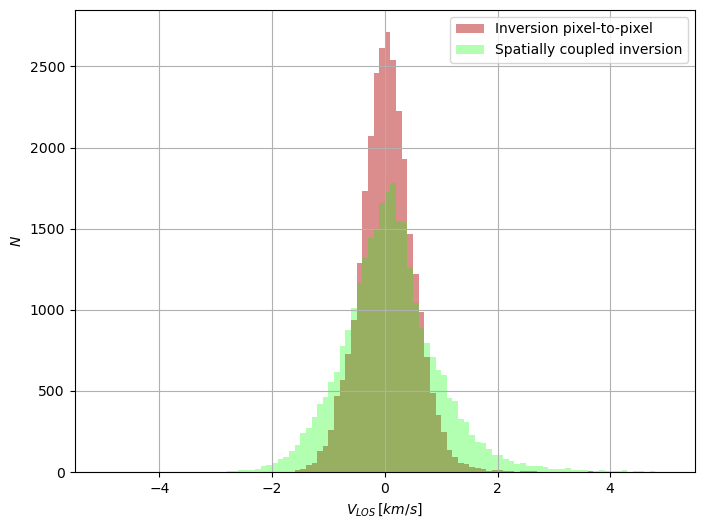

In [42]:
# Separate histogram for line-of-sight velocities (range 'problems')

plt.figure(figsize=(8, 6))
plt.hist(data1[:, :, 3].ravel(), range=(-5,5), bins=num_bins, color='indianred',
         alpha=0.7, label='Inversion pixel-to-pixel')
plt.hist(data2[:, :, 3].ravel(), range=(-5,5), bins=num_bins, color='lime',
         alpha=0.3, label='Spatially coupled inversion')
plt.xlabel(r'$V_{LOS}\,[km/s]$')
plt.ylabel(r'$N$')
plt.legend()
plt.grid()
plt.show()

In [16]:
# Standard deviation and correlation coefficient

parameters_names = ['Magnetic field',
                   'Inclination',
                   'Azimuth',
                   'LOS velocity']

for i in range(4):
    parameter1 = data1[:, :, i].ravel()
    parameter2 = data2[:, :, i].ravel()

    std1 = np.std(parameter1)
    std2 = np.std(parameter2)

    corr_coefficient = np.corrcoef(parameter1, parameter2)[0, 1]

# First values correspond to pixel-to-pixel inversion and second ones correspond to spatially coupled inversion
# $\color{green}{\text{Standard deviations are calculated above:}}$
## STD for magnetic field - 423.32 G & 496.63 G
## STD for azimuth - 0.64 rad & 0.53 rad
## STD for inclination - 0.48 rad & 0.50 rad
## STD for LOS velocity - 0.48 km/s & 0.88 km/s
# $\color{green}{\text{Correlation coefficients are calculated above:}}$
## CC for magnetic field = 0.97
## CC for inclination = 0.96
## CC for azimuth = 0.82
## CC for LOS velocity = 0.86

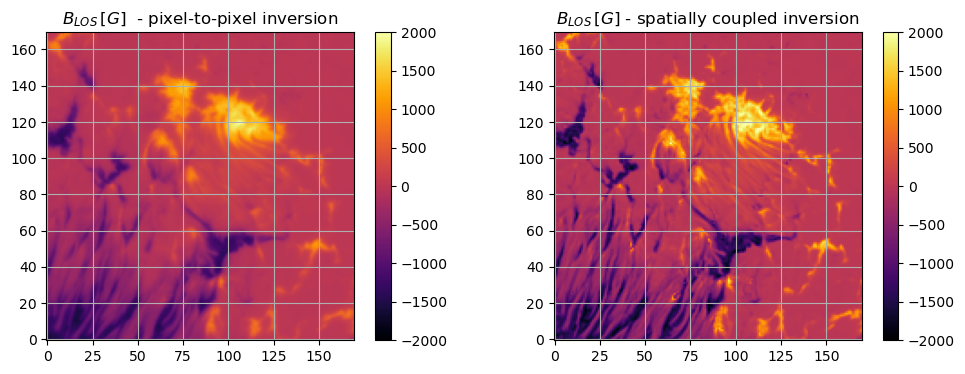

In [37]:
# Plotting line-of-sight component of magnetic fields for both inversion methods

plt.figure(figsize=(12, 4))

# Pixel-to-pixel inversion

plt.subplot(1, 2, 1)
plt.grid()
B_los1 = data1[:,:,0].T*np.cos(data1[:,:,1].T)
plt.imshow(B_los1, origin='lower', cmap='inferno', vmin=-2000, vmax=2000)
plt.title(r'$B_{LOS}\,[G]$  - pixel-to-pixel inversion')
plt.colorbar()

# Spatially coupled inversion

plt.subplot(1, 2, 2)
plt.grid()
B_los2 = data2[:,:,0].T*np.cos(data2[:,:,1].T)
plt.imshow(B_los2, origin='lower', cmap='inferno', vmin=-2000, vmax=2000)
plt.title(r'$B_{LOS}\,[G]$ - spatially coupled inversion')
plt.colorbar()
plt.show()

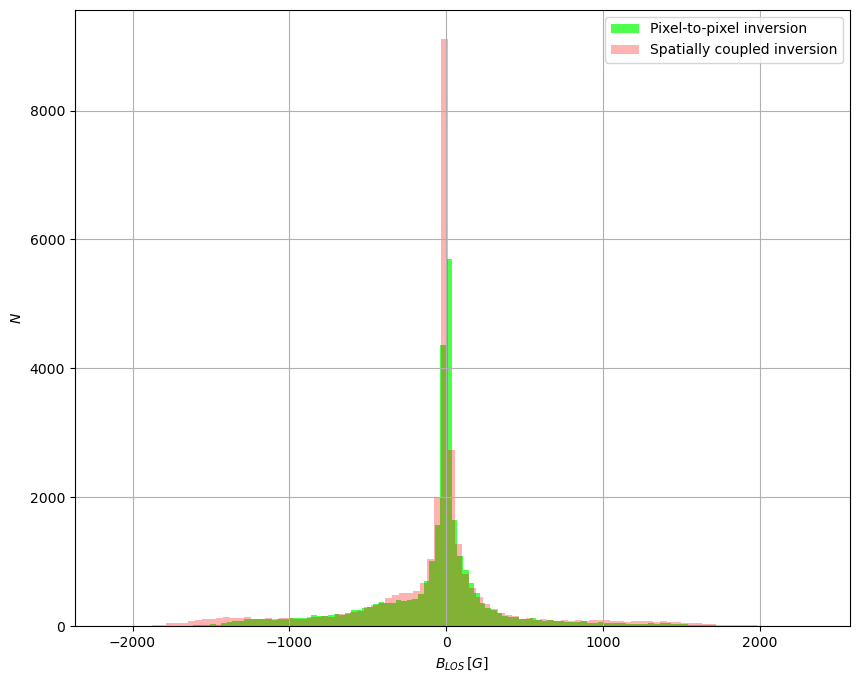

In [35]:
# Histogram for line-of-sight component of magnetic fields from both inversion methods

plt.figure(figsize=(10, 8))
plt.hist(B_los1.flatten(), bins=100, alpha=0.7, color='lime', label=r'Pixel-to-pixel inversion')
plt.hist(B_los2.flatten(), bins=100, alpha=0.3, color='red', label=r'Spatially coupled inversion')
plt.grid()
plt.xlabel(r'$B_{LOS}\,[G]$')
plt.ylabel(r'$N$')
plt.legend()
plt.show()

In [24]:
# Mean values

mean_values = [np.mean(B_los1), np.mean(B_los2)]
print('Mean value for line-of-sight component of magnetic field inferred by pixel-to-pixel inversion:', mean_values[0].round(3))
print('Mean value for line-of-sight component of magnetic field inferred by spatially coupled inversion:', mean_values[1].round(3))

Mean value for line-of-sight component of magnetic field inferred by pixel-to-pixel inversion: -69.542
Mean value for line-of-sight component of magnetic field inferred by spatially coupled inversion: -67.07


In [25]:
# Correlation coefficient

corr_coefficient = np.corrcoef(B_los1, B_los2)[0, 1]
print(corr_coefficient.round(3))

0.992


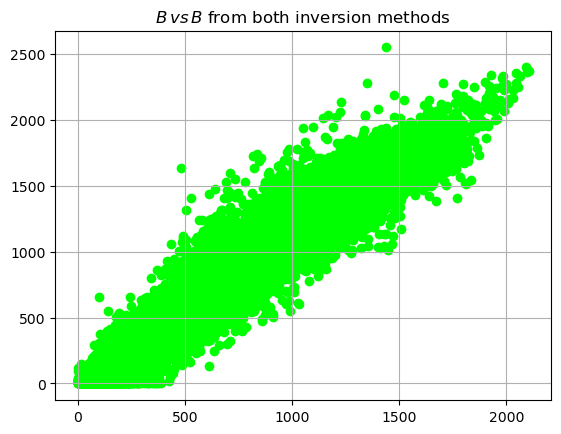

In [28]:
# Magnetic field vs magnetic field - from both inversion methods

plt.grid()
plt.scatter(data1[:, :, 0], data2[:, :, 0], color='lime')
plt.title(r'$B\,vs\,B$ from both inversion methods')
plt.show()